<a href="https://colab.research.google.com/github/urkderk/Volleyball-Project/blob/main/Prediction%20Model%20-%20Spike.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
# special IPython command to prepare the notebook for matplotlib
%matplotlib inline 

import numpy as np
import pandas as pd
import scipy.stats as stats
import matplotlib.pyplot as plt
import sklearn
import statsmodels.api as sm

import seaborn as sns
sns.set_theme(style="whitegrid")

# special matplotlib argument for improved plots
from matplotlib import rcParams
import sys
import os


In [5]:
vball_df = pd.read_csv('clean_data.csv', encoding='unicode_escape')
vball_df = vball_df[vball_df.columns.difference(['index'])]
vball_df = vball_df[vball_df.columns.difference(['date_of_birth'])]
vball_df = vball_df[vball_df.columns.difference(['name'])]
vball_df.head(50)

,block,country,height,position_number,spike,weight
0,305,23,193,3,320,80
1,284,23,182,1,295,71
2,296,23,190,2,306,72
3,278,23,176,6,288,62
4,275,23,181,1,290,70
5,297,23,186,3,306,67
6,295,23,188,2,305,72
7,297,23,187,3,305,78
8,298,23,187,2,305,80
9,300,23,190,4,315,67


In [6]:
vball_df.drop(index=68,inplace=True)
vball_df.drop(index=212,inplace=True)
vball_df.drop(index=356,inplace=True)

In [7]:
vball_df.describe()


,block,country,height,position_number,spike,weight
count,429.000000,429.000000,429.000000,429.000000,429.00000,429.000000
mean,277.433566,19.706294,181.000000,2.748252,288.79021,68.727273
std,24.027017,8.498350,8.239692,1.413231,25.57722,7.367695
min,178.000000,5.000000,153.000000,1.000000,178.00000,52.000000
25%,274.000000,10.000000,175.000000,2.000000,285.00000,63.000000
50%,283.000000,23.000000,182.000000,2.000000,294.00000,69.000000
75%,292.000000,29.000000,187.000000,3.000000,304.00000,73.000000
max,310.000000,31.000000,199.000000,6.000000,336.00000,87.000000


In [8]:
#make position number and country categorical variables
vball_df
vball_df['position_number']
pd.Categorical(vball_df['position_number'])
pd.Categorical(vball_df['country'])
print(vball_df['position_number'])
print(vball_df['country'])

0      3
1      1
2      2
3      6
4      1
      ..
427    2
428    3
429    1
430    1
431    3
Name: position_number, Length: 429, dtype: int64
0      23
1      23
2      23
3      23
4      23
       ..
427    26
428    26
429    26
430    26
431    26
Name: country, Length: 429, dtype: int64


In [9]:
setter = vball_df[vball_df["position_number"] ==1]
outside = vball_df[vball_df["position_number"] ==2]
middle = vball_df[vball_df["position_number"] ==3]
opposite = vball_df[vball_df["position_number"] ==4]
libero = vball_df[vball_df["position_number"] ==6]

In [10]:
# Import regression modules
# ols - stands for Ordinary least squares, we'll use this
import statsmodels.api as sm
from statsmodels.formula.api import ols
# statsmodels works nicely with pandas dataframes
# The thing inside the "quotes" is called a formula, a bit on that below
a = ols('spike ~ height',setter).fit()
print(a.summary())

                            OLS Regression Results                            
Dep. Variable:                  spike   R-squared:                       0.367
Model:                            OLS   Adj. R-squared:                  0.358
Method:                 Least Squares   F-statistic:                     42.26
Date:                Fri, 10 Jun 2022   Prob (F-statistic):           8.65e-09
Time:                        01:28:14   Log-Likelihood:                -319.43
No. Observations:                  75   AIC:                             642.9
Df Residuals:                      73   BIC:                             647.5
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    -52.2595     52.046     -1.004      0.3

Text(0.5, 1.0, 'Setter Spike Height vs Predicted Setter Spike Height: $Y_i$ vs $\\hat{Y}_i$')

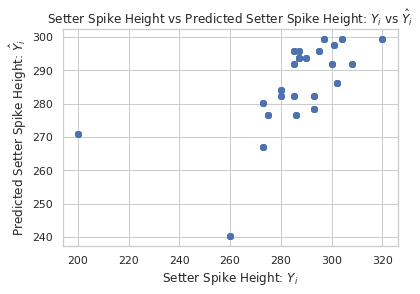

In [40]:
plt.scatter(setter['spike'], a.fittedvalues)
plt.xlabel("Setter Spike Height: $Y_i$")
plt.ylabel("Predicted Setter Spike Height: $\hat{Y}_i$")
plt.title("Setter Spike Height vs Predicted Setter Spike Height: $Y_i$ vs $\hat{Y}_i$")

In [12]:
from sklearn.linear_model import LinearRegression
A = setter.drop('spike', axis = 1)

# This creates a LinearRegression object
lm = LinearRegression()
lm

LinearRegression()

In [13]:
lm.fit(A, setter.spike)

LinearRegression()

In [14]:
print('Estimated intercept coefficient:', lm.intercept_)

Estimated intercept coefficient: -13.842204796929082


In [15]:
print('Number of coefficients:', len(lm.coef_))

Number of coefficients: 5


In [16]:
zip(A.columns, lm.coef_)

In [18]:
# The coefficients
pd.DataFrame(zip(A.columns, lm.coef_), columns = ['features', 'estimatedCoefficients'])

,features,estimatedCoefficients
0,block,0.657298
1,country,-0.128744
2,height,0.710645
3,position_number,0.000000
4,weight,-0.056468


In [19]:
# first five predicted prices
lm.predict(A)[0:5]

array([295.19760455, 288.62774222, 281.99018036, 299.17573705,
       287.23697412])

Text(0.5, 1.0, 'Setter Spike Height vs Predicted Setter Spike Height: $Y_i$ vs $\\hat{Y}_i$')

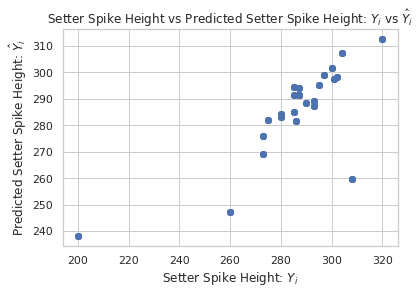

In [20]:
plt.scatter(setter.spike, lm.predict(A))
plt.xlabel("Setter Spike Height: $Y_i$")
plt.ylabel("Predicted Setter Spike Height: $\hat{Y}_i$")
plt.title("Setter Spike Height vs Predicted Setter Spike Height: $Y_i$ vs $\hat{Y}_i$")

In [21]:
## residual sum of squares
print(np.sum((setter.spike - lm.predict(A)) ** 2))

13277.34458928513


In [22]:
##mean squared error
mseFull = np.mean((setter.spike- lm.predict(A)) ** 2)
print(mseFull)

177.0312611904684


FOR OUTSIDE HITTER

In [23]:
b = ols('spike ~ height',outside).fit()
print(b.summary())

                            OLS Regression Results                            
Dep. Variable:                  spike   R-squared:                       0.447
Model:                            OLS   Adj. R-squared:                  0.443
Method:                 Least Squares   F-statistic:                     114.8
Date:                Fri, 10 Jun 2022   Prob (F-statistic):           5.37e-20
Time:                        01:28:39   Log-Likelihood:                -662.41
No. Observations:                 144   AIC:                             1329.
Df Residuals:                     142   BIC:                             1335.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   -212.9189     46.617     -4.567      0.0

Text(0.5, 1.0, 'Outside Height vs Predicted Outside Spike Height: $Y_i$ vs $\\hat{Y}_i$')

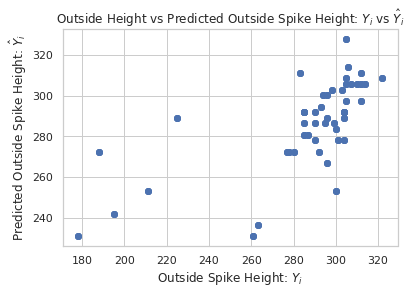

In [24]:
plt.scatter(outside['spike'], b.fittedvalues)
plt.xlabel("Outside Spike Height: $Y_i$")
plt.ylabel("Predicted Outside Spike Height: $\hat{Y}_i$")
plt.title("Outside Height vs Predicted Outside Spike Height: $Y_i$ vs $\hat{Y}_i$")

Estimated intercept coefficient: -74.53801832473664
Number of coefficients: 5


Text(0.5, 1.0, 'Outside Height vs Predicted Outside Spike Height: $Y_i$ vs $\\hat{Y}_i$')

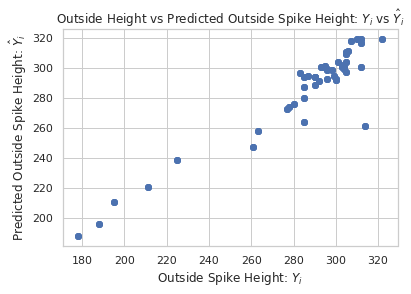

In [25]:
B = outside.drop('spike', axis = 1)
lm.fit(B, outside.spike)
print('Estimated intercept coefficient:', lm.intercept_)
print('Number of coefficients:', len(lm.coef_))
zip(B.columns, lm.coef_)
pd.DataFrame(zip(B.columns, lm.coef_), columns = ['features', 'estimatedCoefficients'])
lm.predict(B)[0:5]
plt.scatter(outside['spike'], lm.predict(B))
plt.xlabel("Outside Spike Height: $Y_i$")
plt.ylabel("Predicted Outside Spike Height: $\hat{Y}_i$")
plt.title("Outside Height vs Predicted Outside Spike Height: $Y_i$ vs $\hat{Y}_i$")

In [26]:
## residual sum of squares
print(np.sum((outside.spike - lm.predict(B)) ** 2))
##mean squared error
mseFull = np.mean((outside.spike - lm.predict(B)) ** 2)
print(mseFull)

16382.142435101268
113.76487802153662


FOR OPPOSITE HITTER

In [27]:
c = ols('spike ~ height',opposite).fit()
print(c.summary())

                            OLS Regression Results                            
Dep. Variable:                  spike   R-squared:                       0.410
Model:                            OLS   Adj. R-squared:                  0.400
Method:                 Least Squares   F-statistic:                     40.37
Date:                Fri, 10 Jun 2022   Prob (F-statistic):           3.53e-08
Time:                        01:28:46   Log-Likelihood:                -251.43
No. Observations:                  60   AIC:                             506.9
Df Residuals:                      58   BIC:                             511.1
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    -86.9189     60.529     -1.436      0.1

Text(0.5, 1.0, 'Opposite Height vs Predicted Opposite Spike Height: $Y_i$ vs $\\hat{Y}_i$')

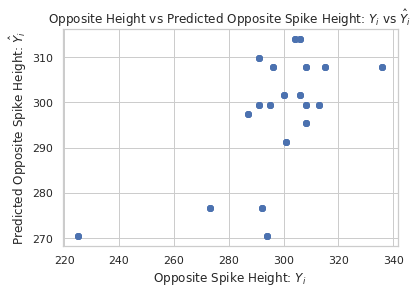

In [28]:
plt.scatter(opposite['spike'], c.fittedvalues)
plt.xlabel("Opposite Spike Height: $Y_i$")
plt.ylabel("Predicted Opposite Spike Height: $\hat{Y}_i$")
plt.title("Opposite Height vs Predicted Opposite Spike Height: $Y_i$ vs $\hat{Y}_i$")

Estimated intercept coefficient: -117.93495295927875
Number of coefficients: 5


Text(0.5, 1.0, 'Opposite Height vs Predicted Opposite Spike Height: $Y_i$ vs $\\hat{Y}_i$')

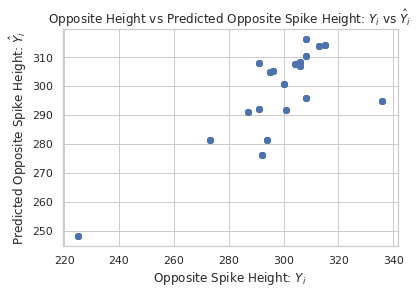

In [29]:
C = opposite.drop('spike', axis = 1)
lm.fit(C, opposite.spike)
print('Estimated intercept coefficient:', lm.intercept_)
print('Number of coefficients:', len(lm.coef_))
zip(C.columns, lm.coef_)
pd.DataFrame(zip(C.columns, lm.coef_), columns = ['features', 'estimatedCoefficients'])
lm.predict(C)[0:5]
plt.scatter(opposite['spike'], lm.predict(C))
plt.xlabel("Opposite Spike Height: $Y_i$")
plt.ylabel("Predicted Opposite Spike Height: $\hat{Y}_i$")
plt.title("Opposite Height vs Predicted Opposite Spike Height: $Y_i$ vs $\hat{Y}_i$")

In [30]:
## residual sum of squares
print(np.sum((opposite.spike - lm.predict(C)) ** 2))
##mean squared error
mseFull = np.mean((opposite.spike - lm.predict(C)) ** 2)
print(mseFull)

10534.65544469063
175.57759074484383


In [31]:
FOR MIDDLE BLOCKER

SyntaxError: ignored

In [32]:
d = ols('spike ~ height',middle).fit()
print(d.summary())

                            OLS Regression Results                            
Dep. Variable:                  spike   R-squared:                       0.060
Model:                            OLS   Adj. R-squared:                  0.051
Method:                 Least Squares   F-statistic:                     6.803
Date:                Fri, 10 Jun 2022   Prob (F-statistic):             0.0104
Time:                        01:28:56   Log-Likelihood:                -415.63
No. Observations:                 108   AIC:                             835.3
Df Residuals:                     106   BIC:                             840.6
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    193.7428     39.604      4.892      0.0

Text(0.5, 1.0, 'Middle Height vs Predicted Middle Spike Height: $Y_i$ vs $\\hat{Y}_i$')

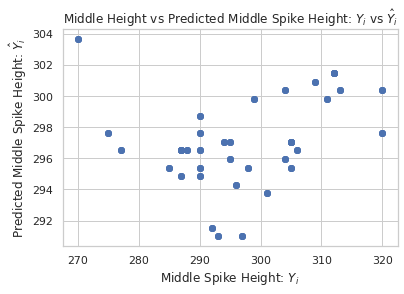

In [33]:
plt.scatter(middle['spike'], d.fittedvalues)
plt.xlabel("Middle Spike Height: $Y_i$")
plt.ylabel("Predicted Middle Spike Height: $\hat{Y}_i$")
plt.title("Middle Height vs Predicted Middle Spike Height: $Y_i$ vs $\hat{Y}_i$")

Estimated intercept coefficient: 52.444229468785124
Number of coefficients: 5


Text(0.5, 1.0, 'Middle Height vs Predicted Middle Spike Height: $Y_i$ vs $\\hat{Y}_i$')

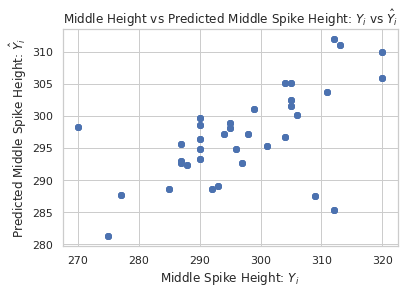

In [34]:
D = middle.drop('spike', axis = 1)
lm.fit(D, middle.spike)
print('Estimated intercept coefficient:', lm.intercept_)
print('Number of coefficients:', len(lm.coef_))
zip(D.columns, lm.coef_)
pd.DataFrame(zip(D.columns, lm.coef_), columns = ['features', 'estimatedCoefficients'])
lm.predict(D)[0:5]
plt.scatter(middle['spike'], lm.predict(D))
plt.xlabel("Middle Spike Height: $Y_i$")
plt.ylabel("Predicted Middle Spike Height: $\hat{Y}_i$")
plt.title("Middle Height vs Predicted Middle Spike Height: $Y_i$ vs $\hat{Y}_i$")

In [35]:
## residual sum of squares
print(np.sum((middle.spike - lm.predict(D)) ** 2))
##mean squared error
mseFull = np.mean((middle.spike - lm.predict(D)) ** 2)
print(mseFull)

9391.08439947854
86.95448518035684


FOR LIBEROS

In [36]:
e = ols('spike ~ height',libero).fit()
print(e.summary())

                            OLS Regression Results                            
Dep. Variable:                  spike   R-squared:                       0.334
Model:                            OLS   Adj. R-squared:                  0.317
Method:                 Least Squares   F-statistic:                     20.06
Date:                Fri, 10 Jun 2022   Prob (F-statistic):           6.12e-05
Time:                        01:29:02   Log-Likelihood:                -185.41
No. Observations:                  42   AIC:                             374.8
Df Residuals:                      40   BIC:                             378.3
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   -176.7646     99.797     -1.771      0.0

Text(0.5, 1.0, 'Libero Height vs Predicted Libero Spike Height: $Y_i$ vs $\\hat{Y}_i$')

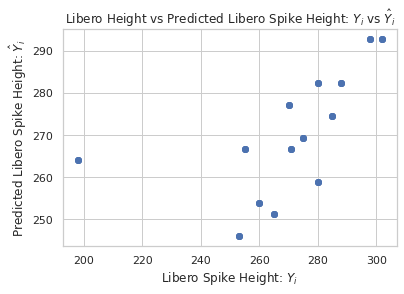

In [37]:
plt.scatter(libero['spike'], e.fittedvalues)
plt.xlabel("Libero Spike Height: $Y_i$")
plt.ylabel("Predicted Libero Spike Height: $\hat{Y}_i$")
plt.title("Libero Height vs Predicted Libero Spike Height: $Y_i$ vs $\hat{Y}_i$")

Estimated intercept coefficient: -64.20467949196183
Number of coefficients: 5


Text(0.5, 1.0, 'Libero Height vs Predicted Libero Spike Height: $Y_i$ vs $\\hat{Y}_i$')

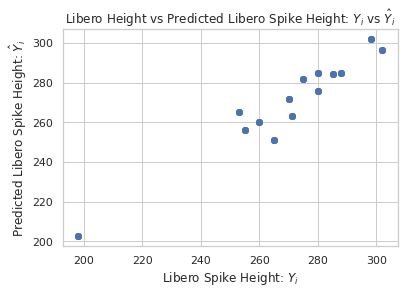

In [38]:
E = libero.drop('spike', axis = 1)
lm.fit(E, libero.spike)
print('Estimated intercept coefficient:', lm.intercept_)
print('Number of coefficients:', len(lm.coef_))
zip(E.columns, lm.coef_)
pd.DataFrame(zip(E.columns, lm.coef_), columns = ['features', 'estimatedCoefficients'])
lm.predict(E)[0:5]
plt.scatter(libero['spike'], lm.predict(E))
plt.xlabel("Libero Spike Height: $Y_i$")
plt.ylabel("Predicted Libero Spike Height: $\hat{Y}_i$")
plt.title("Libero Height vs Predicted Libero Spike Height: $Y_i$ vs $\hat{Y}_i$")

In [39]:
## residual sum of squares
print(np.sum((libero.spike - lm.predict(E)) ** 2))
##mean squared error
mseFull = np.mean((libero.spike - lm.predict(E)) ** 2)
print(mseFull)

1699.8281277716671
40.47209828027777
